In [1]:
import sys
sys.path.append("../")
import unet.utils.metrics as metrics
import unet.utils.data_utils as utils
import skimage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/Users/ctromans/miniconda3/envs/maddox-dbp/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


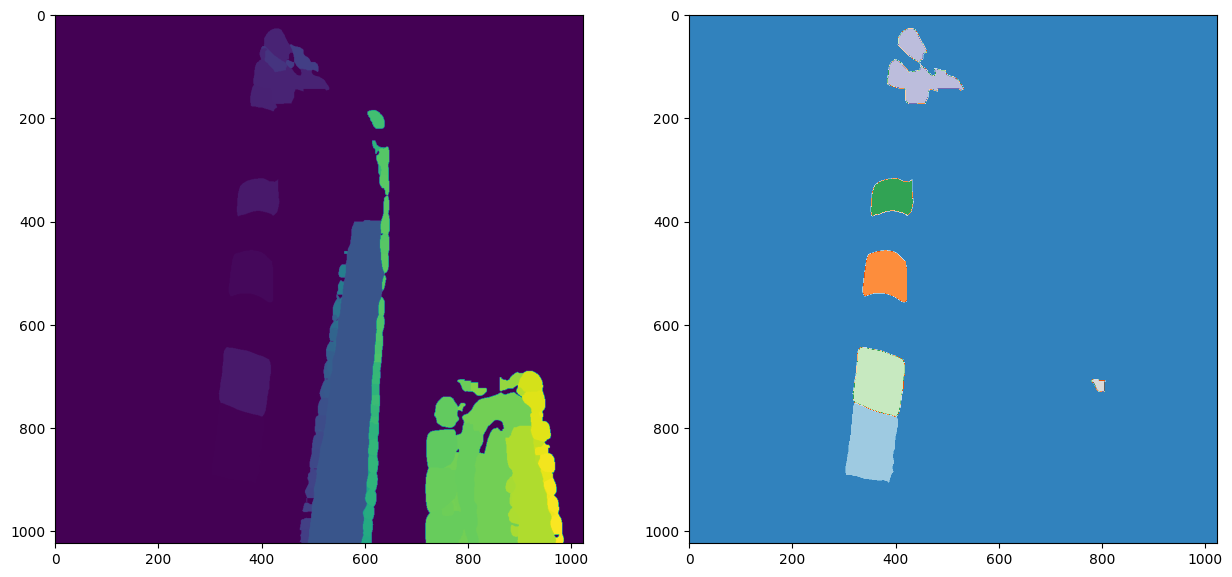

In [21]:
gt_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/data/masks/mx85-nd-acqusition-8-ground-truth.tif")
pred_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/experiments/044/output/mx85-nd-acqusition-8-stacked-channels_labelled.tif")

# pred_mask_f = utils.filter_objects(pred_mask, max_size=50, min_size=5)
# pred_mask_f = utils.filter_objects(pred_mask, max_size=100, min_size=51)
pred_mask_f = utils.filter_objects(pred_mask, max_size=200, min_size=101)

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].imshow(pred_mask[12,...])
ax[1].imshow(pred_mask_f[12,...], cmap="tab20c")

In [ ]:
rows = []
for th in np.arange(0,1.1,0.1):
    rows.append(evaluate_segmentation(gt_img, pred_img, th))
seg_eval = pd.DataFrame.from_dict(rows)

In [92]:
gt_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/data/masks/mx85-nd-acqusition-8-ground-truth.tif")
pred_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/experiments/044/output/mx85-nd-acqusition-8-stacked-channels_labelled.tif")

performance_df = pd.DataFrame()


target_masks = utils.filter_objects(gt_mask)
predicted_masks = utils.filter_objects(pred_mask)
rows = []
for th in np.arange(0,1.1,0.1):
    performance = metrics.evaluate_segmentation(target_masks, predicted_masks, th)
    performance.update({"max_min_object_size": [maxmin]})
    rows.append(performance)
performance_df = pd.concat([performance_df, pd.DataFrame.from_dict(rows)])

performance_df.to_csv("acq8_test_iou_segmentation_performance_all_cells.csv", index=False)

In [2]:
df = pd.read_csv("acq8_test_iou_segmentation_performance_all_cells.csv")
df

,threshold,num_gt_objects,num_pred_objects,f1,true_positive,false_positive,false_negative,precision,recall,merges,splits,perc_merged,perc_split,max_min_object_size
0,0.0,324,280,0.673684,32,1,30,0.969697,0.516129,254,262,362.857143,80.864198,"[(200, 101)]"
1,0.1,324,280,0.695652,200,68,107,0.746269,0.651466,20,17,6.578947,5.246914,"[(200, 101)]"
2,0.2,324,280,0.651007,194,84,124,0.697842,0.610063,9,6,2.857143,1.851852,"[(200, 101)]"
3,0.3,324,280,0.582781,176,104,148,0.628571,0.543210,0,0,0.000000,0.000000,"[(200, 101)]"
4,0.4,324,280,0.500000,151,129,173,0.539286,0.466049,0,0,0.000000,0.000000,"[(200, 101)]"
5,0.5,324,280,0.367550,111,169,213,0.396429,0.342593,0,0,0.000000,0.000000,"[(200, 101)]"
6,0.6,324,280,0.178808,54,226,270,0.192857,0.166667,0,0,0.000000,0.000000,"[(200, 101)]"
7,0.7,324,280,0.059603,18,262,306,0.064286,0.055556,0,0,0.000000,0.000000,"[(200, 101)]"
8,0.8,324,280,0.006623,2,278,322,0.007143,0.006173,0,0,0.000000,0.000000,"[(200, 101)]"
9,0.9,324,280,0.000000,0,280,324,0.000000,0.000000,0,0,0.000000,0.000000,"[(200, 101)]"


In [31]:
colour_palette = [(80, 250, 123), (255, 184, 108), (189, 147, 249), (255, 85, 85)]
plot_colours = colour_palette
for i in range(len(colour_palette)):
    r, g, b = colour_palette[i]
    # Convert RGB (0, 255) to (0, 1) which matplotlib likes
    plot_colours[i] = (r / 255, g / 255, b / 255)

[Text(0.5, 0, 'IoU threshold'), Text(0, 0.5, 'F1 score')]

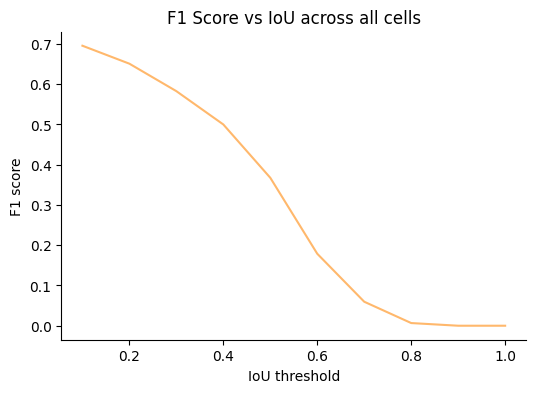

In [43]:
df = pd.read_csv("acq8_test_iou_segmentation_performance_all_cells.csv")
# Start from a threshold of 0.1
df = df[~(df["threshold"].isin([0]))]

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df["threshold"], df["f1"], color=plot_colours[1])
ax.set_title("F1 Score vs IoU across all cells")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set(xlabel="IoU threshold", ylabel="F1 score")



In [25]:
gt_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/data/masks/mx85-nd-acqusition-8-ground-truth.tif")
pred_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/experiments/044/output/mx85-nd-acqusition-8-stacked-channels_labelled.tif")

performance_df = pd.DataFrame()

max_min = [(50, 5), (100, 51), (200, 101)]

for maxmin in max_min:
    target_masks = utils.filter_objects(gt_mask, max_size=maxmin[0], min_size=maxmin[1])
    predicted_masks = utils.filter_objects(pred_mask, max_size=maxmin[0], min_size=maxmin[1])
    rows = []
    for th in np.arange(0,1.1,0.1):
        performance = metrics.evaluate_segmentation(target_masks, predicted_masks, th)
        performance.update({"max_min_object_size": [maxmin]})
        rows.append(performance)
    performance_df = pd.concat([performance_df, pd.DataFrame.from_dict(rows)])

# for maxmin in max_min:
#     target_masks = utils.filter_objects(gt_mask, max_size=maxmin[0], min_size=maxmin[1])
#     predicted_masks = utils.filter_objects(pred_mask, max_size=maxmin[0], min_size=maxmin[1])
#     performance = metrics.evaluate_segmentation(target_masks, predicted_masks)
#     performance.update({"max_min_object_side": [maxmin] * len(performance["threshold"])})
#     performance_df = pd.concat([performance_df, pd.DataFrame.from_dict(performance)])

performance_df.to_csv("acq8_test_iou_segmentation_performance.csv", index=False)

,threshold,num_gt_objects,num_pred_objects,f1,true_positive,false_positive,false_negative,precision,recall,merges,splits,perc_merged,perc_split,max_min_object_side
0,0.0,281,274,0.513761,28,18,35,0.608696,0.444444,232,218,473.469388,77.580071,"[(50, 5)]"
1,0.1,281,274,0.629002,167,96,101,0.634981,0.623134,13,13,4.850746,4.626335,"[(50, 5)]"
2,0.2,281,274,0.594096,161,106,114,0.602996,0.585455,5,6,1.811594,2.135231,"[(50, 5)]"
3,0.3,281,274,0.540541,150,124,131,0.547445,0.533808,0,0,0.000000,0.000000,"[(50, 5)]"
4,0.4,281,274,0.464865,129,145,152,0.470803,0.459075,0,0,0.000000,0.000000,"[(50, 5)]"
5,0.5,281,274,0.342342,95,179,186,0.346715,0.338078,0,0,0.000000,0.000000,"[(50, 5)]"
6,0.6,281,274,0.154955,43,231,238,0.156934,0.153025,0,0,0.000000,0.000000,"[(50, 5)]"
7,0.7,281,274,0.032432,9,265,272,0.032847,0.032028,0,0,0.000000,0.000000,"[(50, 5)]"
8,0.8,281,274,0.000000,0,274,281,0.000000,0.000000,0,0,0.000000,0.000000,"[(50, 5)]"
9,0.9,281,274,0.000000,0,274,281,0.000000,0.000000,0,0,0.000000,0.000000,"[(50, 5)]"


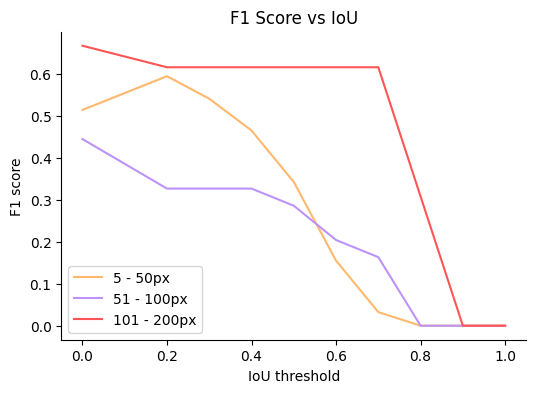

In [46]:
df = pd.read_csv("acq8_test_iou_segmentation_performance.csv")
# Start from a threshold of 0.1
df = df[~(df["threshold"].isin([0.1]))]
max_min = [(50, 5), (100, 51), (200, 101)]

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df[(df["max_min_object_size"].str.contains(str(max_min[0]), regex=False))]["threshold"], df[(df["max_min_object_size"].str.contains(str(max_min[0]), regex=False))]["f1"], label=f"{max_min[0][1]} - {max_min[0][0]}px", color=plot_colours[1])
ax.plot(df[(df["max_min_object_size"].str.contains(str(max_min[1]), regex=False))]["threshold"], df[(df["max_min_object_size"].str.contains(str(max_min[1]), regex=False))]["f1"], label=f"{max_min[1][1]} - {max_min[1][0]}px", color=plot_colours[2])
ax.plot(df[(df["max_min_object_size"].str.contains(str(max_min[2]), regex=False))]["threshold"], df[(df["max_min_object_size"].str.contains(str(max_min[2]), regex=False))]["f1"], label=f"{max_min[2][1]} - {max_min[2][0]}px", color=plot_colours[3])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("F1 Score vs IoU")
ax.set(xlabel="IoU threshold", ylabel="F1 score")
ax.legend()

In [81]:
df.columns

Index(['threshold', 'num_gt_objects', 'num_pred_objects', 'f1',
       'true_positive', 'false_positive', 'false_negative', 'precision',
       'recall', 'merges', 'splits', 'perc_merged', 'perc_split',
       'max_min_object_size'],
      dtype='object')

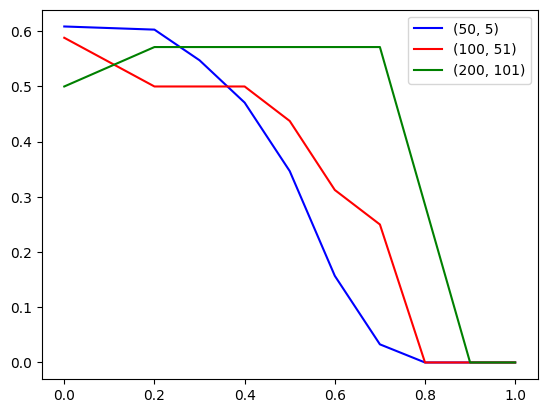

In [82]:
df = pd.read_csv("acq8_test_iou_segmentation_performance.csv")
# Start from a threshold of 0.1
df = df[~(df["threshold"].isin([0.1]))]

fig, ax = plt.subplots()
ax.plot(df[(df["max_min_object_size"].str.contains(str(max_min[0]), regex=False))]["threshold"], df[(df["max_min_object_size"].str.contains(str(max_min[0]), regex=False))]["precision"], label=max_min[0], color="blue")
ax.plot(df[(df["max_min_object_size"].str.contains(str(max_min[1]), regex=False))]["threshold"], df[(df["max_min_object_size"].str.contains(str(max_min[1]), regex=False))]["precision"], label=max_min[1], color="red")
ax.plot(df[(df["max_min_object_size"].str.contains(str(max_min[2]), regex=False))]["threshold"], df[(df["max_min_object_size"].str.contains(str(max_min[2]), regex=False))]["precision"], label=max_min[2], color="green")
ax.set_title("Precision Score vs IoU")
ax.legend()

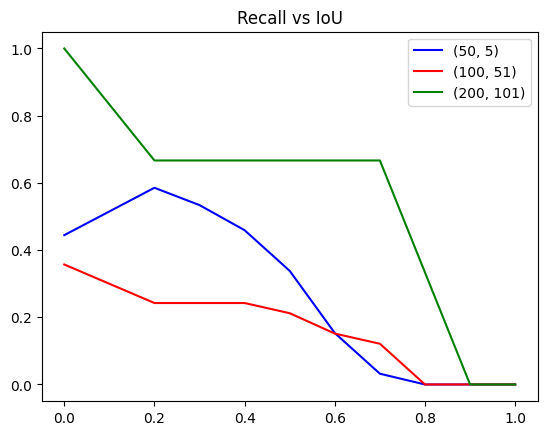

In [85]:
df = pd.read_csv("acq8_test_iou_segmentation_performance.csv")
# Start from a threshold of 0.1
df = df[~(df["threshold"].isin([0.1]))]

fig, ax = plt.subplots()
ax.plot(df[(df["max_min_object_size"].str.contains(str(max_min[0]), regex=False))]["threshold"], df[(df["max_min_object_size"].str.contains(str(max_min[0]), regex=False))]["recall"], label=max_min[0], color="blue")
ax.plot(df[(df["max_min_object_size"].str.contains(str(max_min[1]), regex=False))]["threshold"], df[(df["max_min_object_size"].str.contains(str(max_min[1]), regex=False))]["recall"], label=max_min[1], color="red")
ax.plot(df[(df["max_min_object_size"].str.contains(str(max_min[2]), regex=False))]["threshold"], df[(df["max_min_object_size"].str.contains(str(max_min[2]), regex=False))]["recall"], label=max_min[2], color="green")
ax.set_title("Recall vs IoU")
ax.legend()

1.0


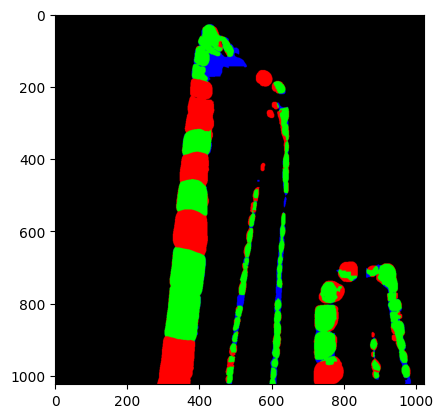

In [108]:
def display_difference(gt_masks, pred_masks):
    """
    Return an image that shows areas predicted corrently (green) and areas
    missed (red)
    """
    
    # Create an empty array, ready to be coloured, with input image shape
    img = np.zeros(gt_masks.shape, dtype=np.uint8)
    img = skimage.color.gray2rgb(img)

    # Red will mark unmatched GT and green will match where GT overlaps
    # with prediction
    # Blue will mark areas that were predicted, but are not present in the 
    # GT 
    red = (255, 0, 0)
    green = (0, 255, 0)
    blue = (0, 0, 255)

    # Flatten masks into 2d array depicting area which contains a mask
    # Resolution of overlapping masks is lost    
    gt = gt_masks > 0
    pred = pred_masks > 0 
    
    # True positive overlaps
    # Green
    tp_overlaps = np.where((gt == 1) & (pred == 1), 1, np.zeros(gt_masks.shape))
    
    # False negative overlaps
    # Red
    fn_overlaps = np.where((gt == 1) & (pred == 0), 1, np.zeros(gt_masks.shape))
    
    # False positive overlaps
    # Blue
    fp_overlaps = np.where((gt == 0) & (pred == 1), 1, np.zeros(gt_masks.shape))

    print(tp_overlaps.max())
    
    for channel in range(3):
        img[...,channel] = np.where(tp_overlaps == 1, green[channel], img[...,channel])
        img[...,channel] = np.where(fn_overlaps == 1, red[channel], img[...,channel])
        img[...,channel] = np.where(fp_overlaps == 1, blue[channel], img[...,channel])
    
    return img

gt_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/data/masks/mx85-nd-acqusition-8-ground-truth.tif")
pred_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/experiments/044/output/mx85-nd-acqusition-8-stacked-channels_labelled.tif")
pred_mask_f = utils.filter_objects(pred_mask, max_size=200, min_size=5)
out = display_difference(gt_mask, pred_mask_f)

fig, ax = plt.subplots()
ax.imshow(out[12,...])
skimage.io.imsave("test.tiff", out)

In [2]:
# ROC curve
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("acq8_test_iou_segmentation_performance.csv")
df["precision"] = ((df["true_positive"] + df["true"]))
df

,threshold,num_gt_objects,num_pred_objects,f1,true_positive,false_positive,false_negative,precision,recall,merges,splits,perc_merged,perc_split,max_min_object_size
0,0.0,281,274,0.513761,28,18,35,0.608696,0.444444,232,218,473.469388,77.580071,"[(50, 5)]"
1,0.1,281,274,0.629002,167,96,101,0.634981,0.623134,13,13,4.850746,4.626335,"[(50, 5)]"
2,0.2,281,274,0.594096,161,106,114,0.602996,0.585455,5,6,1.811594,2.135231,"[(50, 5)]"
3,0.3,281,274,0.540541,150,124,131,0.547445,0.533808,0,0,0.000000,0.000000,"[(50, 5)]"
4,0.4,281,274,0.464865,129,145,152,0.470803,0.459075,0,0,0.000000,0.000000,"[(50, 5)]"
5,0.5,281,274,0.342342,95,179,186,0.346715,0.338078,0,0,0.000000,0.000000,"[(50, 5)]"
6,0.6,281,274,0.154955,43,231,238,0.156934,0.153025,0,0,0.000000,0.000000,"[(50, 5)]"
7,0.7,281,274,0.032432,9,265,272,0.032847,0.032028,0,0,0.000000,0.000000,"[(50, 5)]"
8,0.8,281,274,0.000000,0,274,281,0.000000,0.000000,0,0,0.000000,0.000000,"[(50, 5)]"
9,0.9,281,274,0.000000,0,274,281,0.000000,0.000000,0,0,0.000000,0.000000,"[(50, 5)]"


In [2]:
gt_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/data/masks/mx85-nd-acqusition-8-ground-truth.tif")
pred_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/experiments/044/output/mx85-nd-acqusition-8-stacked-channels_labelled.tif")

performance_df = pd.DataFrame()

target_masks = utils.filter_objects(gt_mask)
predicted_masks = utils.filter_objects(pred_mask)
rows = []
for th in np.arange(0,0.2,0.1):
    performance = metrics.evaluate_segmentation(target_masks, predicted_masks, th)
    # performance.update({"max_min_object_size": [maxmin]})
    rows.append(performance)
performance_df = pd.concat([performance_df, pd.DataFrame.from_dict(rows)])

# performance_df.to_csv("acq8_test_iou_segmentation_performance_all_cells.csv", index=False)

In [64]:
gt_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/data/masks/mx85-nd-acqusition-8-ground-truth.tif")
pred_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/experiments/044/output/mx85-nd-acqusition-8-stacked-channels_prediction.tif")

gt_mask = skimage.segmentation.find_boundaries(gt_mask) > 0.5
pred_mask = pred_mask > 0.5

In [65]:
import sklearn.metrics 

accuracy = sklearn.metrics.accuracy_score(target_masks.flatten(), pred_mask.flatten())
precision = sklearn.metrics.precision_score(target_masks.flatten(), pred_mask.flatten())
recall = sklearn.metrics.recall_score(target_masks.flatten(), pred_mask.flatten())
f1 = sklearn.metrics.f1_score(target_masks.flatten(), pred_mask.flatten())

np.round([accuracy, precision, recall, f1], 3)

array([0.951, 0.507, 0.684, 0.582])

In [66]:

np.round(iou(target_masks.flatten(), predicted_masks.flatten()), 3)

0.411

In [76]:
import sklearn.metrics 

gt_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/data/masks/mx85-nd-acqusition-8-ground-truth.tif")
pred_mask = skimage.io.imread("/Users/ctromans/image-analysis/UNet_3D_C_elegans/experiments/044/output/mx85-nd-acqusition-8-stacked-channels_prediction.tif")

gt_mask = skimage.segmentation.find_boundaries(gt_mask) > 0.5
pred_mask = pred_mask > 0.5

def iou(mask_true, mask_pred):
    intersection = np.logical_and(mask_true, mask_pred)
    union = np.logical_or(mask_true, mask_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

accuracy = sklearn.metrics.accuracy_score(target_masks.flatten(), pred_mask.flatten())
precision = sklearn.metrics.precision_score(target_masks.flatten(), pred_mask.flatten())
recall = sklearn.metrics.recall_score(target_masks.flatten(), pred_mask.flatten())
f1 = sklearn.metrics.f1_score(target_masks.flatten(), pred_mask.flatten())
iou = iou(target_masks.flatten(), pred_mask.flatten())
rand = sklearn.metrics.adjusted_rand_score(target_masks.flatten(), pred_mask.flatten())
# mse = sklearn.metrics.mean_squared_error(target_masks.flatten(), pred_mask.flatten())

np.round([accuracy, precision, recall, f1, iou, rand], 3)

array([0.951, 0.507, 0.684, 0.582, 0.411, 0.526])